In [60]:
#!pip install banpei

from pyod.models.copod import COPOD
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

train = pd.read_csv('train_predictions.csv')
train.drop('Timestamp',axis=1,inplace=True)
test = pd.read_csv('test_predictions.csv')
test.drop('Timestamp',axis=1,inplace=True)

In [45]:
anomalies=[]

def to_xcoords(list):
    xcoords=[]
    csum=0
    for i in list:
        csum+=1
        i = csum*i
        anomalies.append(i)
        
normie_police = COPOD()
normie_police.fit(test)
to_xcoords(normie_police.labels_)

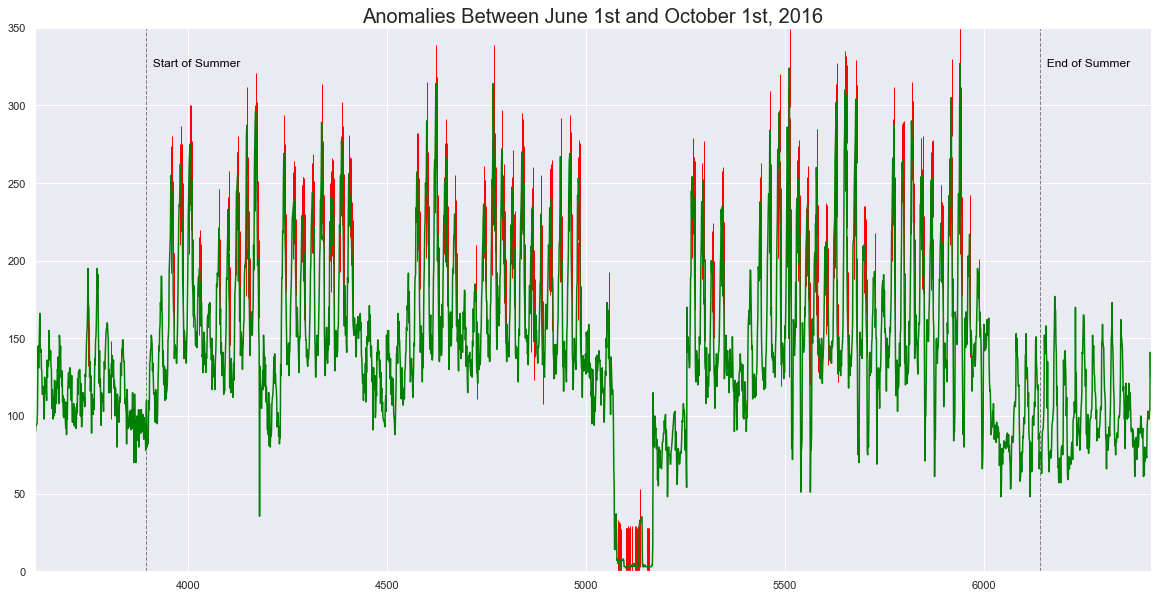

In [120]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('darkgrid')
sns.lineplot(data=test['tv delta'][3616:6420],color='green')

ymins=[]
ymaxs=[]

for i in range(len(anomalies)):
    ymins.append(int(test['tv delta'][i]-25))
    ymaxs.append(int(test['tv delta'][i]+25))

plt.vlines(x=anomalies, ymin=ymins, ymax=ymaxs, colors='red', ls='-', lw=1)
#plt.vlines

plt.vlines(x=3895, ymin=0, ymax=350, colors='grey', ls='--', lw=1)
plt.text(x=3895, y=325, s='  Start of Summer', alpha=1, color='black')

plt.vlines(x=6141, ymin=0, ymax=350, colors='grey', ls='--', lw=1)
plt.text(x=6141, y=325, s='  End of Summer', alpha=1, color='black')

#add vlines marking summer start (June 20th, 3895) and end (September 22, 6141)

plt.xlim(3616,6420)
plt.ylim(0,350)
plt.title("Anomalies Between June 1st and October 1st, 2016", fontsize=20) #actually goes a lil past oct 1st
plt.savefig('Summer 2016 Anomalies using PyOD.jpeg', bbox_inches='tight') 
plt.show()

In [92]:
asd=pd.read_csv('test_predictions.csv')

In [93]:
asd

,Unnamed: 0,Unnamed: 0.1,Timestamp,Values,Temperature,holiday,Weekday,Hour,Month,Day,Time Delta,value delta,tv delta,prev value,twice prev value,day shift,month shift,year,pred
0,0,33896,2016-01-01 00:00:00+00:00,15838241.0,5.0,1,4,0,1,1,1.0,41.0,41.0,29.0,41.0,19.0,123.0,2016,42.866667
1,1,33897,2016-01-01 01:00:00+00:00,15838284.0,5.0,1,4,1,1,1,1.0,43.0,43.0,41.0,29.0,19.0,125.0,2016,39.996667
2,2,33898,2016-01-01 02:00:00+00:00,15838314.0,5.0,1,4,2,1,1,1.0,30.0,30.0,43.0,41.0,19.0,121.0,2016,36.516667
3,3,33899,2016-01-01 03:00:00+00:00,15838356.0,5.2,1,4,3,1,1,1.0,42.0,42.0,30.0,43.0,18.0,117.0,2016,40.340000
4,4,33900,2016-01-01 04:00:00+00:00,15838399.0,5.2,1,4,4,1,1,1.0,43.0,43.0,42.0,30.0,20.0,130.0,2016,41.810000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15823,15823,49719,2017-12-05 04:00:00+00:00,17827373.0,-5.5,0,1,4,12,5,1.0,199.0,199.0,162.0,168.0,168.0,80.0,2017,163.490000
15824,15824,49720,2017-12-05 05:00:00+00:00,17827538.0,-5.5,0,1,5,12,5,1.0,165.0,165.0,199.0,162.0,145.0,118.0,2017,180.130000
15825,15825,49721,2017-12-05 06:00:00+00:00,17827730.0,-6.7,0,1,6,12,5,1.0,192.0,192.0,165.0,199.0,186.0,87.0,2017,188.845000
15826,15826,49722,2017-12-05 07:00:00+00:00,17827913.0,-4.7,0,1,7,12,5,1.0,183.0,183.0,192.0,165.0,150.0,111.0,2017,187.260000
